In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
df = pd.read_csv('advertising.csv')

# Display the first few rows of the dataset
print(df.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [3]:
# Get the summary statistics
print(df.describe())

# Get information about the dataset
print(df.info())


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


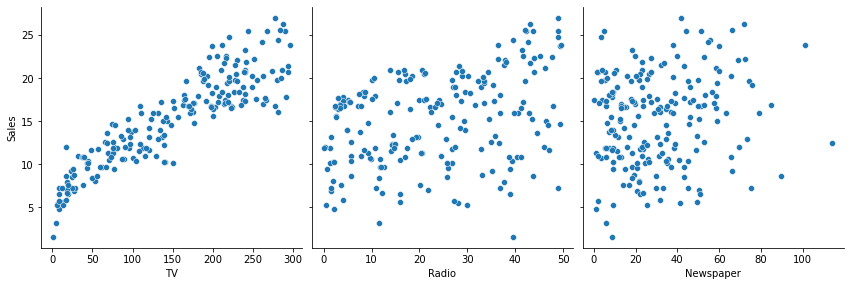

In [4]:
# Pairplot to visualize the relationships
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [5]:
# Define the feature (TV) and target (Sales)
X = df[['TV']]
y = df['Sales']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 6.101072906773964
R^2 Score: 0.802561303423698


In [12]:
# Ensure X_test is flattened to match y_pred
X_test_flat = X_test.values.flatten()

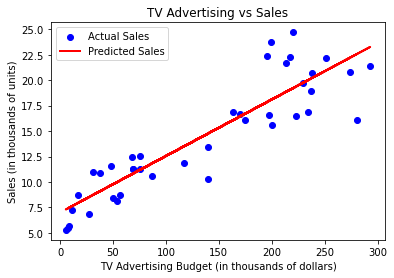

In [13]:
# Plot the regression line
plt.scatter(X_test_flat, y_test, color='blue', label='Actual Sales')
plt.plot(X_test_flat, y_pred, color='red', linewidth=2, label='Predicted Sales')
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.title('TV Advertising vs Sales')
plt.legend()
plt.show()